In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from create_data import create_data

In [4]:
cr = create_data()

In [5]:
tm_df = cr.tmsdata()

In [6]:
df = cr.tmsdata()
print(df.head(3))
df.info()
daily = df.groupby('date').agg({'revenue': 'sum', 'cost': 'sum'})
daily['margin'] = daily['revenue'] - daily['cost']
print(daily.head(3))
daily['rev_ma7'] = daily['margin'].rolling(7).mean();

         date channel campaign    segment   device   region  impressions  \
0  2024-01-01   Email     EM-6        New  Desktop    Daegu         1128   
1  2024-01-01   Email     EM-4  Returning   Mobile    Seoul         1069   
2  2024-01-01     SMS     SM-5        New   Mobile  Incheon         1032   

   clicks  cost  conversions  revenue       ctr       cvr       cpc       cac  \
0     103  3.38            3   163.94  0.091312  0.029126  0.032816  1.126667   
1      86  3.21            2    86.08  0.080449  0.023256  0.037326  1.605000   
2      94  3.10            6   262.18  0.091085  0.063830  0.032979  0.516667   

        roas  
0  48.502959  
1  26.816199  
2  84.574194  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1820 non-null   object 
 1   channel      1820 non-null   object 
 2   campaign     1820 non-null   o

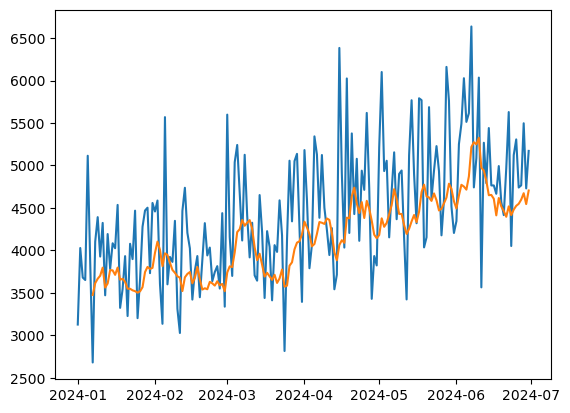

In [7]:
plt.figure()
plt.plot(daily['revenue'])
plt.plot(daily['rev_ma7'])
plt.savefig('daily_revenue_ma.png')
plt.show()
plt.close()

         clicks  impressions
channel                     
Ads       62253      2078733
Email     43124       479629
Push      41248       519648


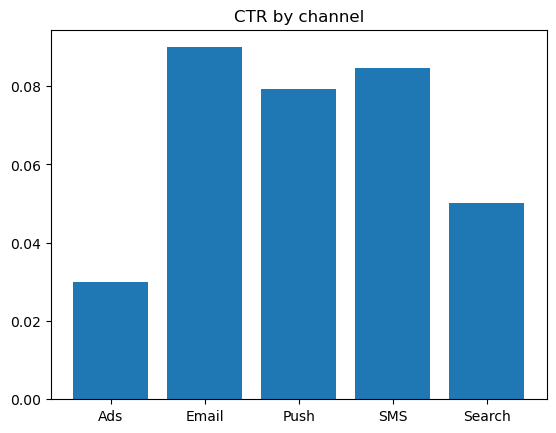

In [8]:
ctr_channel = df.groupby('channel').agg({'clicks': 'sum', 'impressions': 'sum'})
print(ctr_channel.head(3))
ctr_channel['ctr'] = ctr_channel['clicks']/ctr_channel['impressions']

plt.figure();
plt.bar(ctr_channel.index.values, ctr_channel.ctr)
plt.title("CTR by channel")
plt.savefig('ctr_channel.png')
plt.show()
plt.close()

In [9]:
import seaborn as sns
agg = df.groupby(['channel', 'campaign']).agg({'impressions': 'sum', 'revenue': 'sum', 'cost': 'sum'})

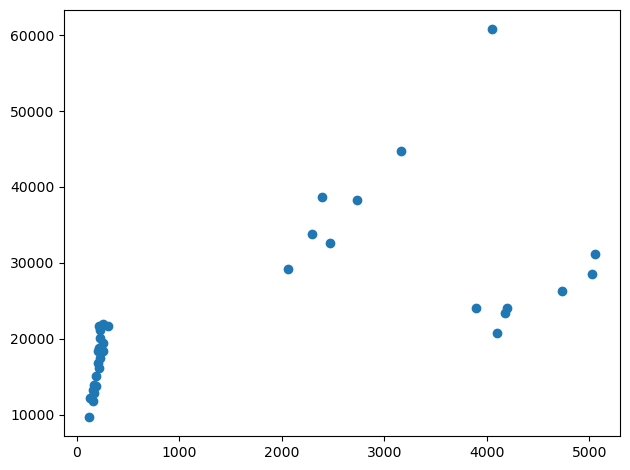

<Figure size 640x480 with 0 Axes>

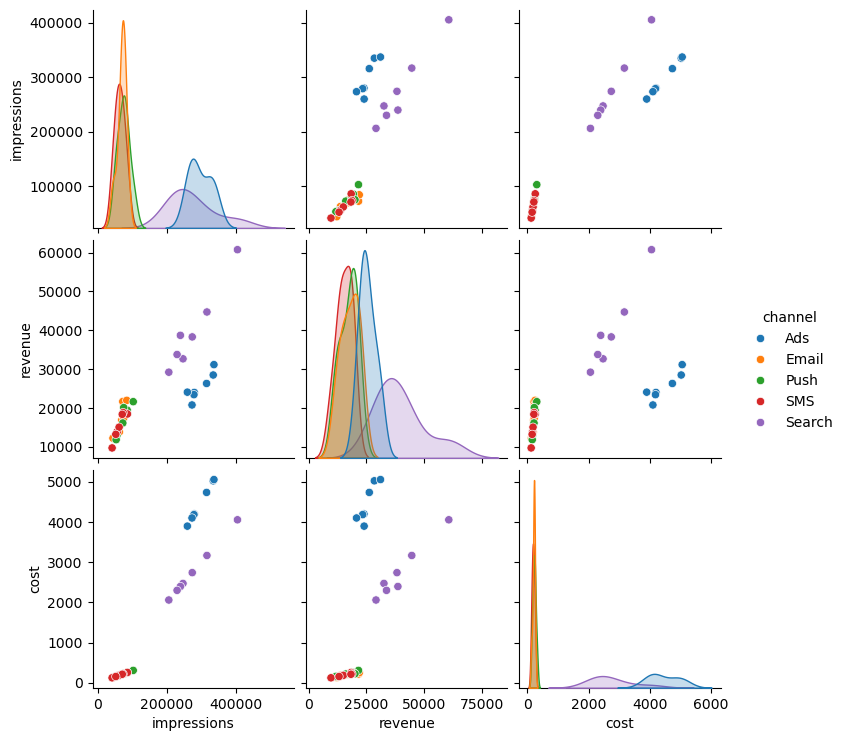

In [10]:
plt.figure()
plt.scatter(agg['cost'], agg['revenue'])
plt.tight_layout()
plt.savefig('plt_scatter.png')
plt.show()
plt.close()

agg.reset_index(inplace=True)

plt.figure()
sns.pairplot(agg, vars = ['impressions', 'revenue', 'cost'], hue='channel', diag_kind='kde')
plt.savefig('sns_pairplot.png')
plt.show()
plt.close()

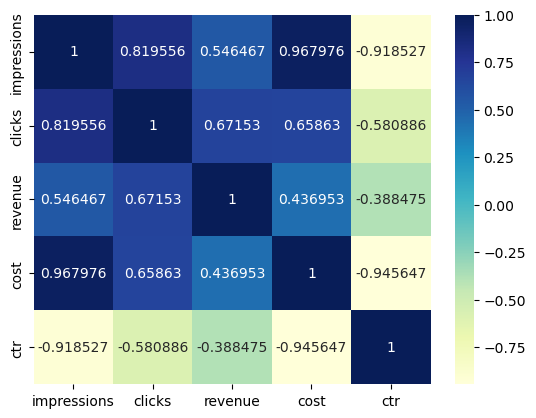

In [11]:
plt.figure()
metrics = df[['impressions', 'clicks', 'revenue', 'cost', 'ctr']]
corr = metrics.corr()
sns.heatmap(corr, annot=True, fmt='g', cmap='YlGnBu')
plt.savefig('corr_heatmap.png')
plt.show()
plt.close()

In [12]:
cat_df = cr.catdata()
print(cat_df.head(10))

        date channel    segment   device   region response
0 2024-05-18   Email        New   Mobile  Gwangju      Yes
1 2024-06-08    Push  Returning   Mobile  Incheon       No
2 2024-04-26     SMS  Returning   Mobile  Incheon       No
3 2024-07-28   Email        New   Mobile  Daejeon       No
4 2024-06-07     SMS        New   Mobile  Daejeon       No
5 2024-06-23     Ads  Returning   Mobile    Seoul      Yes
6 2024-04-24    Push  Returning   Mobile  Incheon      Yes
7 2024-07-13     SMS  Returning   Mobile    Seoul       No
8 2024-07-02    Push  Returning  Desktop    Seoul       No
9 2024-05-28     Ads        New   Mobile  Incheon       No


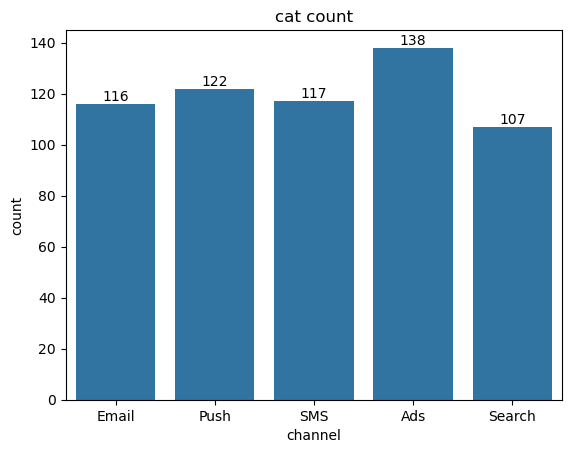

In [14]:
plt.figure()
ax = sns.countplot(cat_df, x='channel', stat='count')
ax.set_title('cat count')

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.savefig('cat_countplot.png')
plt.show()
plt.close()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

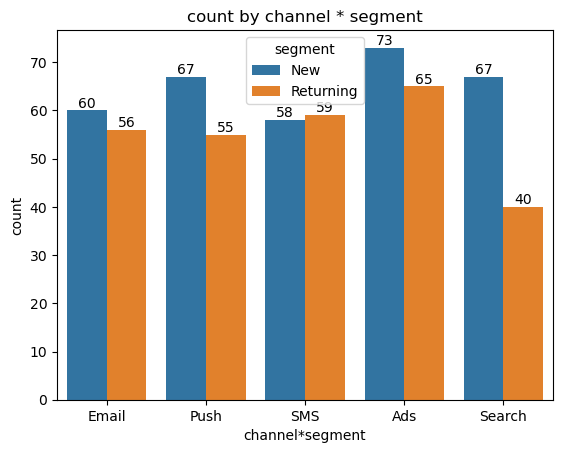

In [15]:
plt.figure()
ax = sns.countplot(cat_df, x='channel', hue='segment')
ax.set_title('count by channel * segment')
ax.set_xlabel('channel*segment')
ax.set_ylabel('count')

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.savefig('cat_countplot_hue.png')
plt.show()
plt.close()

In [16]:
regionorder = df['region'].value_counts().index

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

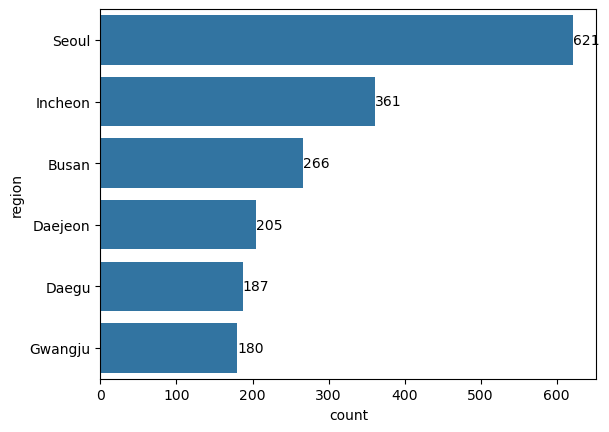

In [17]:
plt.figure()
ax = sns.countplot(order = regionorder, y='region', data=df)
ax.set_xlabel('count')
ax.set_ylabel('region')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.savefig('region_countplot.png')
plt.show()
plt.close()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

<Figure size 640x480 with 0 Axes>

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

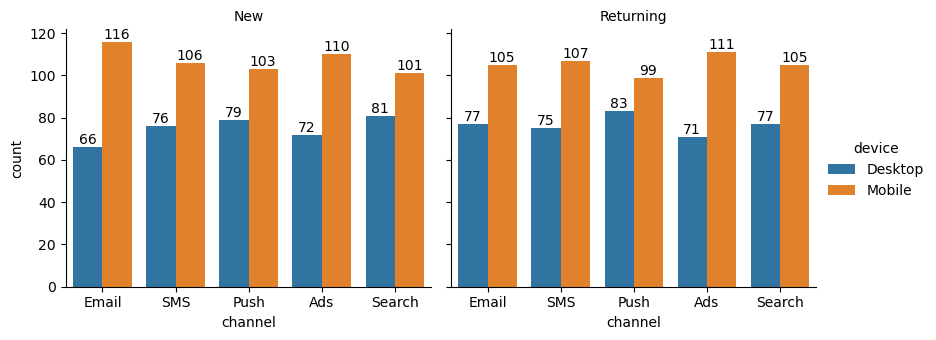

In [18]:
plt.figure()
ax = sns.catplot(kind = 'count',
                data = df,
                x = 'channel',
                hue = 'device',
                col = 'segment',
                col_wrap = 2,
                height = 3.5,
                aspect = 1.2)
ax.set_titles(col_template="{col_name}")

for axis in ax.axes.flat:
      for container in axis.containers:
          axis.bar_label(container, fmt='%d')

plt.savefig('catplot.png')
plt.show()
plt.close()

In [17]:
import pickle

In [18]:
with open('refresh.pkl', 'rb') as f:
      try:
          new_df = pickle.load(f)
          print(new_df.head())
          new_df.info()
      except Exception as e:
          print(f"에러: {e}")

                   날짜    서버 비고
0 2023-12-21 12:39:00  OM11   
1 2023-12-21 21:39:00  OM06   
2 2023-12-22 08:23:00  OM13   
3 2023-12-22 08:28:00  OM05   
4 2023-12-22 08:56:00  OM01   
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      107 non-null    datetime64[ns]
 1   서버      107 non-null    object        
 2   비고      107 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.6+ KB


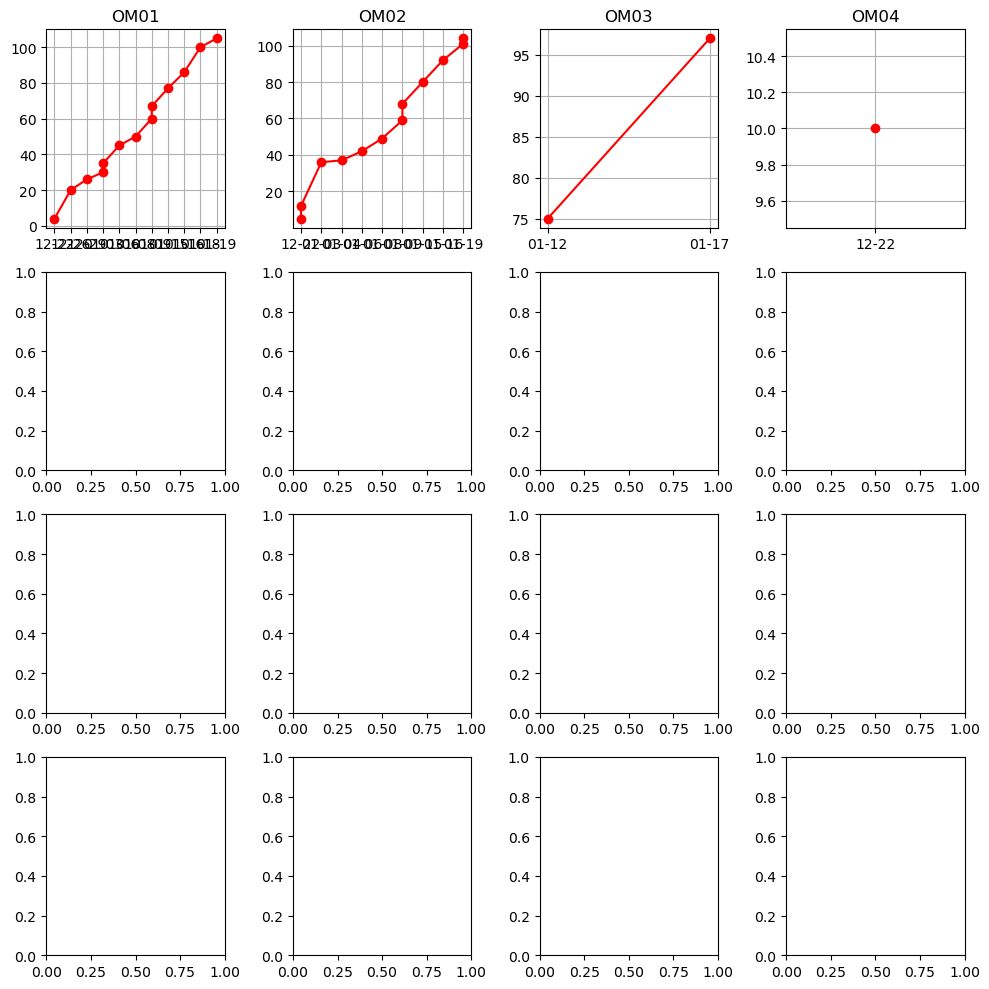

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [21]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for row in range(4):
  for col in range(4):
      idx = row * 4 + col + 1
      server = f"OM{idx:02d}"
      temp_df = new_df.loc[new_df['서버']==server]
      ax = axes[row, col]
      # marker='o' 또는 다른 유효한 마커 사용
      ax.plot(temp_df.날짜.dt.strftime("%m-%d"), temp_df.index, marker='o', color='red')
      ax.grid(True)
      ax.set_title(server)

  plt.tight_layout()
  plt.show()